In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data = pd.read_csv("dataset.csv")
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  01-01-2012            0.0      12.8       5.0   4.7  drizzle
1  02-01-2012           10.9      10.6       2.8   4.5     rain
2  03-01-2012            0.8      11.7       7.2   2.3     rain
3  04-01-2012           20.3      12.2       5.6   4.7     rain
4  05-01-2012            1.3       8.9       2.8   6.1     rain


In [ ]:
print(data.shape)

(1461, 6)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("dataset.csv")
print(data.head())
print(data.shape)
data.info()

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))

# Get unique encoded weather values
unique_encoded_weather = sorted(data['weather_encoded'].unique())

# Get corresponding weather names for tick labels
tick_labels = [weather_names[weather] for weather in le.classes_]
# le.classes_ contains the original weather names in the order they were encoded

  # Use the correct list of tick labels

plt.show() # Display the plot

         date  precipitation  temp_max  temp_min  wind  weather
0  01-01-2012            0.0      12.8       5.0   4.7  drizzle
1  02-01-2012           10.9      10.6       2.8   4.5     rain
2  03-01-2012            0.8      11.7       7.2   2.3     rain
3  04-01-2012           20.3      12.2       5.6   4.7     rain
4  05-01-2012            1.3       8.9       2.8   6.1     rain
(1461, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [ ]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


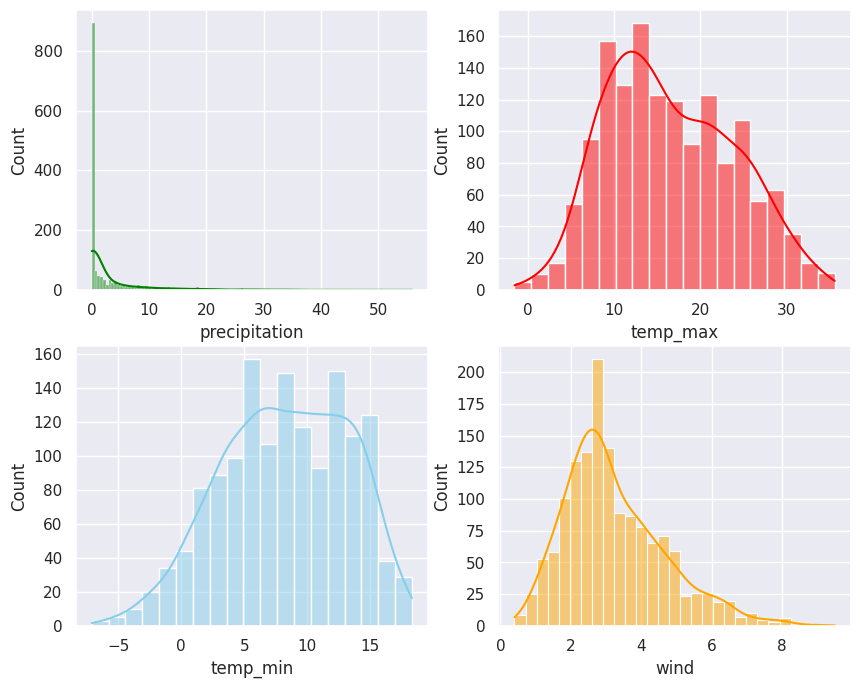

In [ ]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

<ipython-input-9-25f96482ff76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


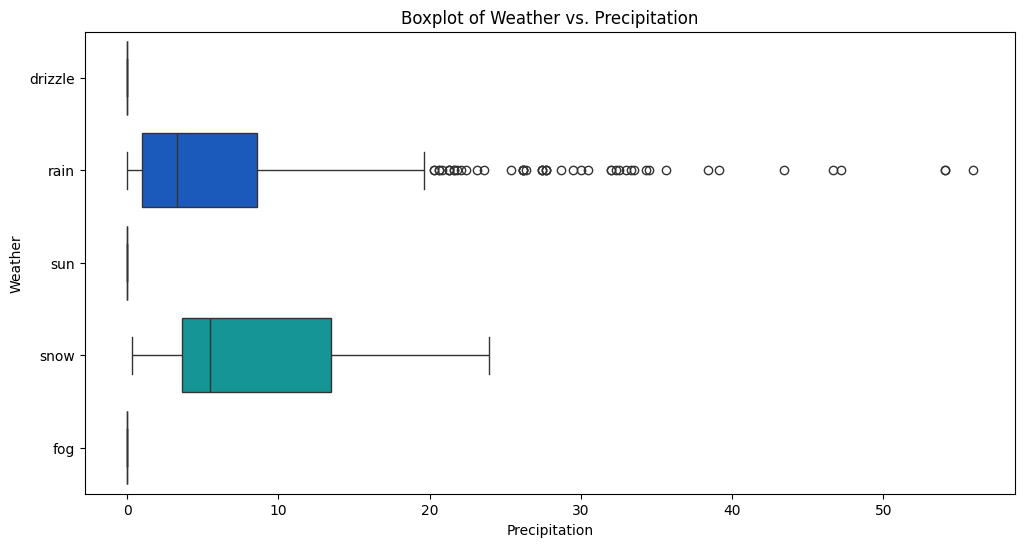

In [ ]:
#Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)

    # Optional: set axis labels and title if desired
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

<ipython-input-14-a9022658b09a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax,)


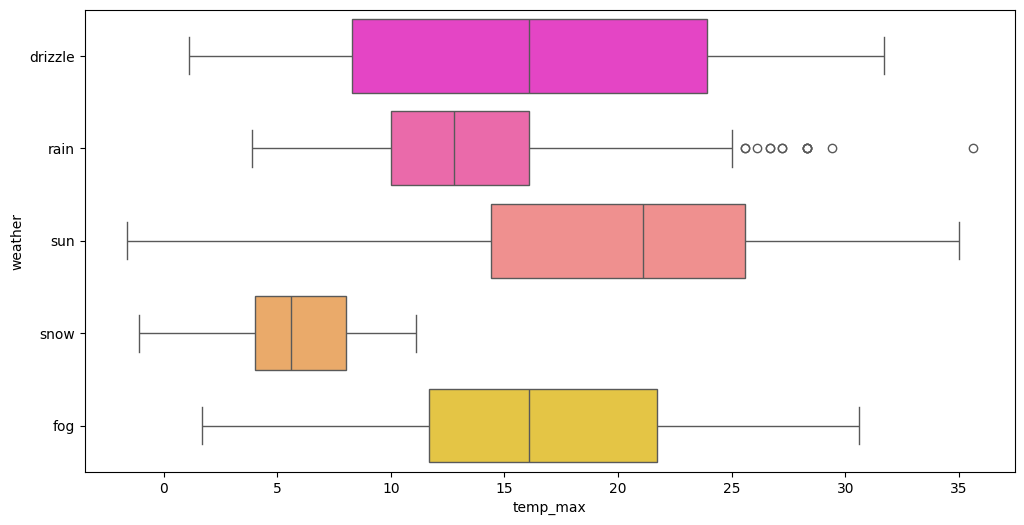

In [ ]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax,)

<ipython-input-10-031f230c8b51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


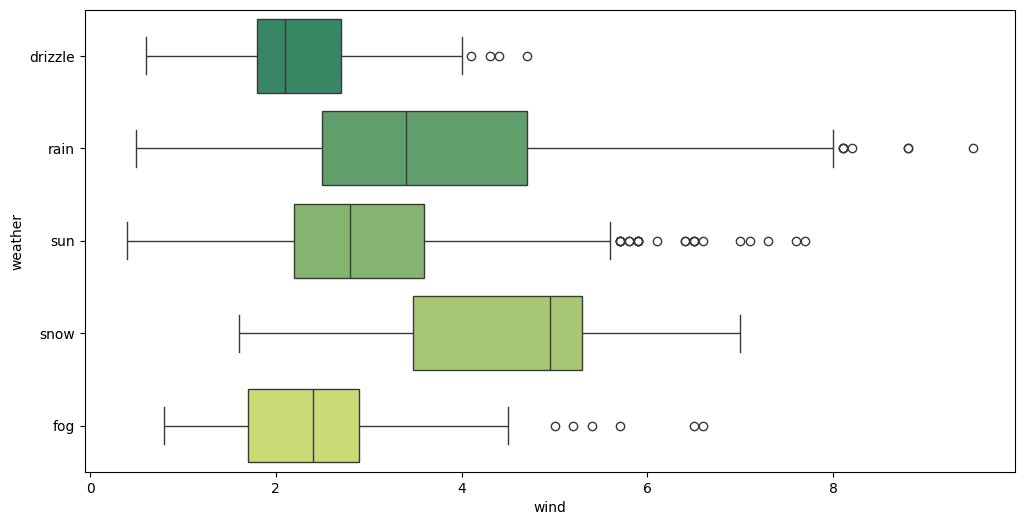

In [ ]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)

<ipython-input-12-c5f553a3edf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


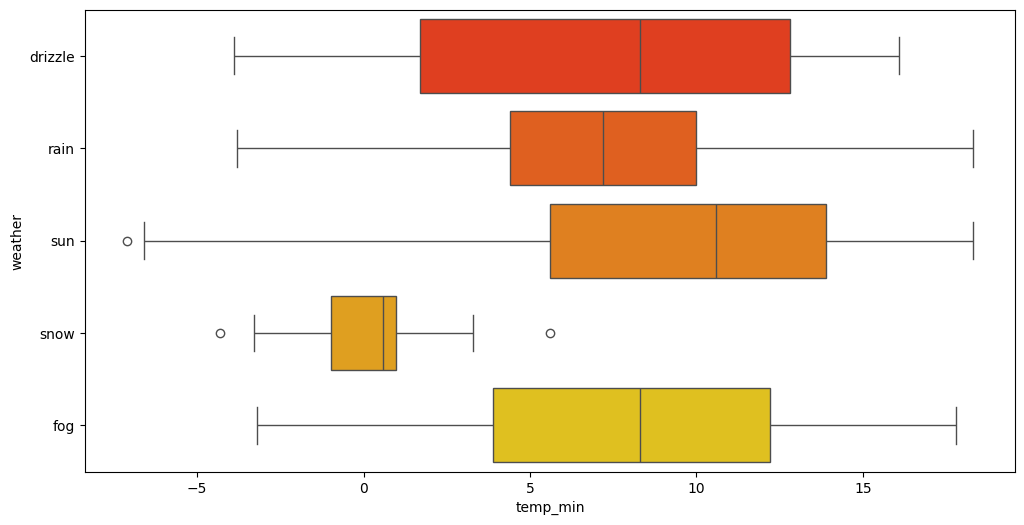

In [ ]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)

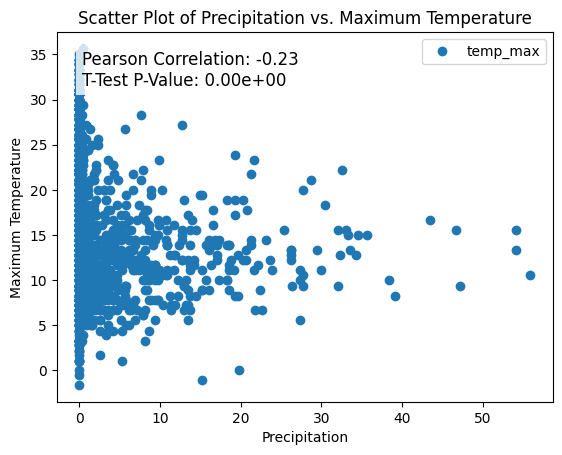

In [ ]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("precipitation", "temp_max", style='o')

    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')

    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')

    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

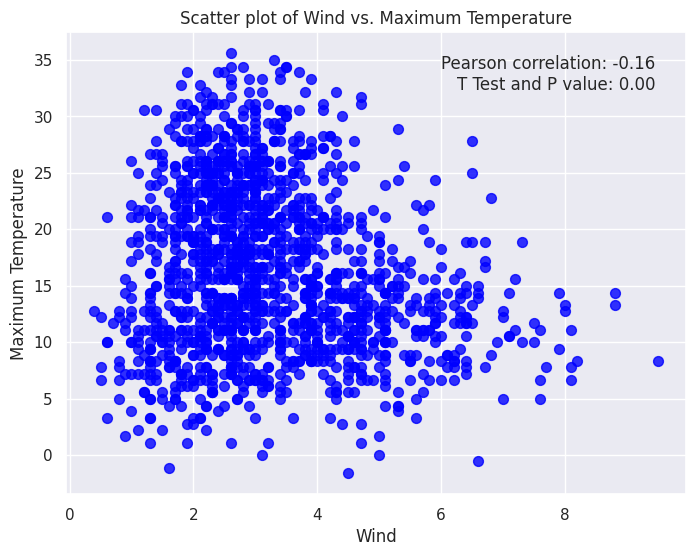

In [ ]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

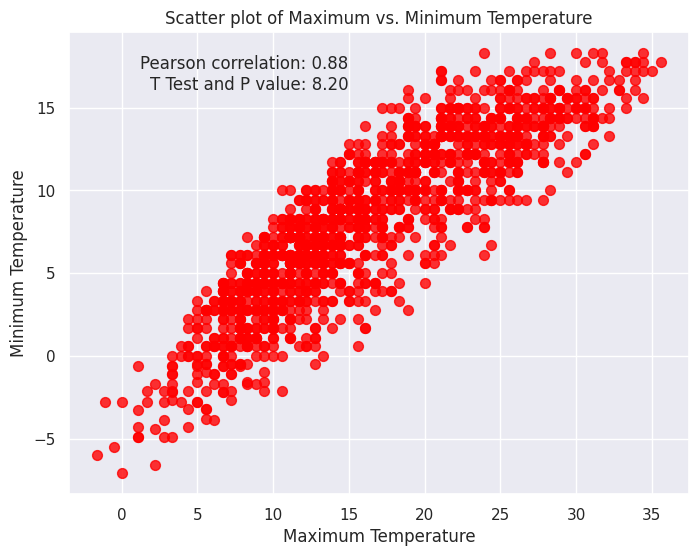

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))

ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

In [ ]:
# Find the total number of null values in each column
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64


In [ ]:
llll

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


from matplotlib import pyplot as plt
_df_0['precipitation'].plot(kind='hist', bins=20, title='precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['wind'].plot(kind='hist', bins=20, title='wind')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='precipitation', y='temp_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='temp_max', y='temp_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='temp_min', y='wind', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='wind', y='weather_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['precipitation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('precipitation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['temp_max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('temp_max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['temp_min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('temp_min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['wind']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('wind')

from matplotlib import pyplot as plt
_df_13['precipitation'].plot(kind='line', figsize=(8, 4), title='precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['temp_max'].plot(kind='line', figsize=(8, 4), title='temp_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['temp_min'].plot(kind='line', figsize=(8, 4), title='temp_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['wind'].plot(kind='line', figsize=(8, 4), title='wind')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='precipitation', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='temp_max', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='temp_min', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='wind', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])

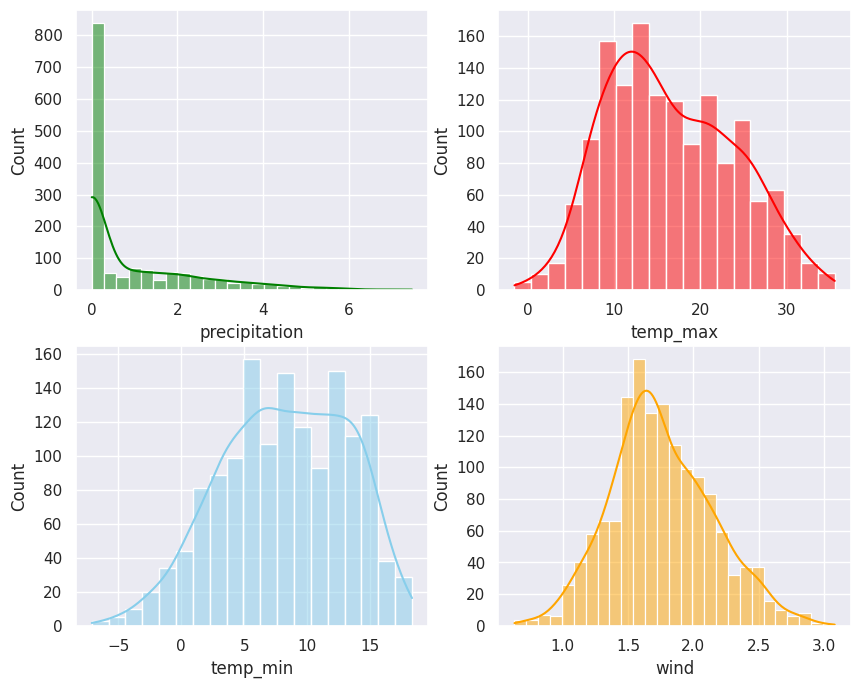

In [ ]:
sns.set(style="darkgrid")

# create a 2x2 subplot grid with a specified size
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):

    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.000000,12.8,5.0,2.167948,drizzle,0
1,3.301515,10.6,2.8,2.121320,rain,2
2,0.894427,11.7,7.2,1.516575,rain,2
3,4.505552,12.2,5.6,2.167948,rain,2
4,1.140175,8.9,2.8,2.469818,rain,2


from matplotlib import pyplot as plt
_df_21['precipitation'].plot(kind='hist', bins=20, title='precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['wind'].plot(kind='hist', bins=20, title='wind')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='precipitation', y='temp_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='temp_max', y='temp_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='temp_min', y='wind', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='wind', y='weather_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['precipitation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('precipitation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['temp_max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('temp_max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['temp_min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('temp_min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weather_encoded']
  ys = series['wind']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('weather_encoded', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weather_encoded')
_ = plt.ylabel('wind')

from matplotlib import pyplot as plt
_df_34['precipitation'].plot(kind='line', figsize=(8, 4), title='precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['temp_max'].plot(kind='line', figsize=(8, 4), title='temp_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['temp_min'].plot(kind='line', figsize=(8, 4), title='temp_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['wind'].plot(kind='line', figsize=(8, 4), title='wind')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='precipitation', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='temp_max', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='temp_min', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='wind', y='weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
if "weather" in df.columns:
    df = df.drop("weather", axis=1)


x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values[:,0:]
y = df["weather_encoded"].values

In [ ]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.16
Root Mean Squared Error (RMSE): 1.08
R-squared (R²): 0.18
Linear Regression Accuracy: 34.81%

Confusion Matrix:
[[ 0  0  3  6  0]
 [ 0  0  4 20  1]
 [ 0  1 74 45  0]
 [ 0  0  4  4  0]
 [ 0  0  8 99 24]]

Performance Matrix

              precision    recall  f1-score   support

    accuracy                           0.35       293
   macro avg       0.00      0.00      0.00       293
weighted avg       0.00      0.00      0.00       293



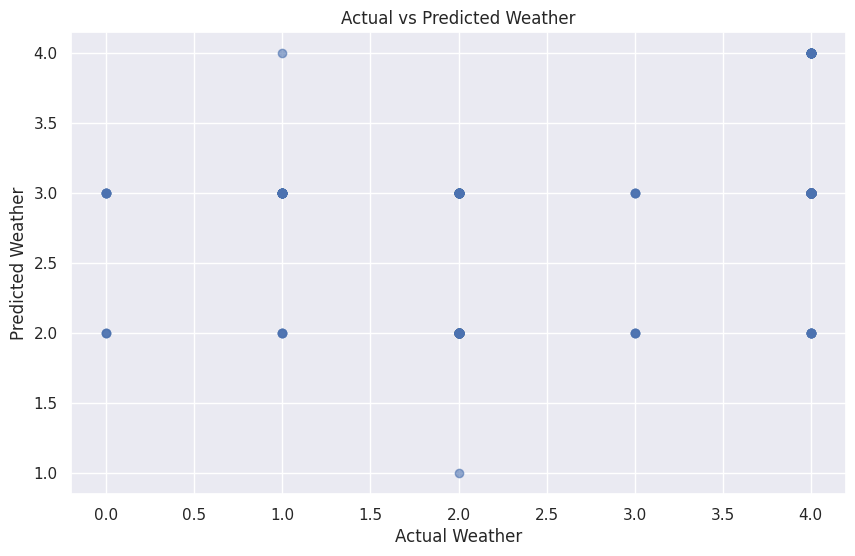

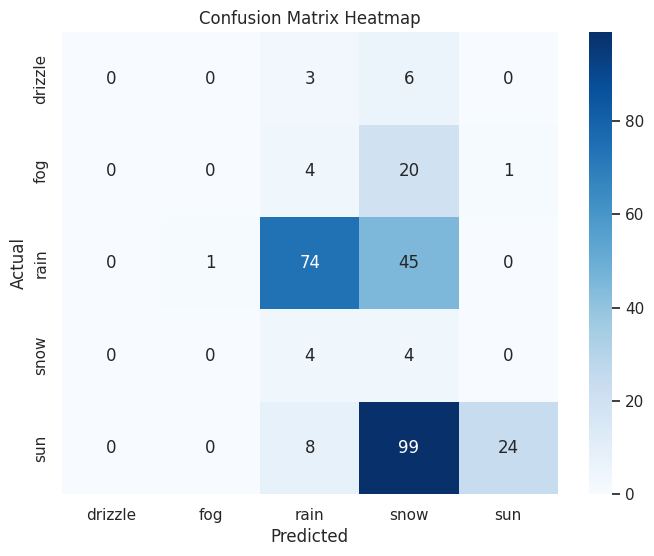

<ipython-input-185-48ba84f8c4fb>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


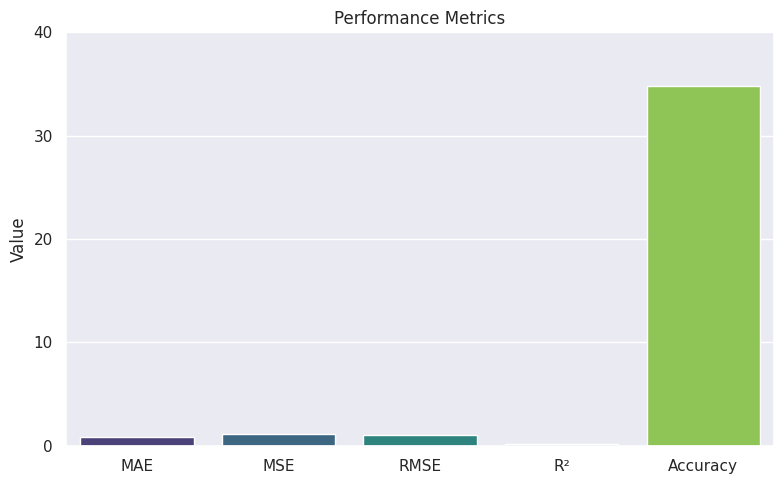

In [ ]:
#LINEAR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("dataset.csv")

# Separate the target variable (assuming 'weather' is the target)
y = data['weather']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Drop non-numeric columns from the features
X = data.drop(columns=['weather'])  # Remove target from features
X = X.select_dtypes(include=[np.number])  # Only numeric columns are kept

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Implementing Linear Regression from scratch
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of ones)

        # Normal Equation: (X_b.T * X_b)^-1 * X_b.T * y
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.weights)

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train.to_numpy().astype(float), y_train)

# Predicting on test set
y_pred = lin_reg.predict(X_test.to_numpy().astype(float))

# Since y_pred is continuous, we need to round or convert it to class labels
# We can map continuous predictions to the nearest class labels
class_labels = np.unique(y_encoded)
y_pred_labels = np.clip(np.round(y_pred).astype(int), class_labels.min(), class_labels.max())

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred_labels)
mse = mean_squared_error(y_test, y_pred_labels)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_labels)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Classification Report with zero_division parameter
class_report = classification_report(y_test, y_pred_labels, output_dict=True, zero_division=0)

# Displaying results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Linear Regression Accuracy: {accuracy * 100:.2f}%")  # Print accuracy as a percentage

# Printing the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Performance Matrix
print("\nPerformance Matrix")
performance_matrix = f"""
              precision    recall  f1-score   support
"""

# Loop through each class label to build the performance matrix
for label in class_report.keys():
    if isinstance(label, int):  # Ensure we are only iterating through the class labels
        precision = class_report[label]['precision']
        recall = class_report[label]['recall']
        f1_score = class_report[label]['f1-score']
        support = class_report[label]['support']
        performance_matrix += f"""
           {label}       {precision:.2f}      {recall:.2f}      {f1_score:.2f}         {support:.0f}
"""

# Include accuracy and averages
valid_labels = [label for label in class_report if isinstance(label, int) and class_report[label]['support'] > 0]

if valid_labels:
    macro_avg_precision = np.mean([class_report[label]['precision'] for label in valid_labels])
    macro_avg_recall = np.mean([class_report[label]['recall'] for label in valid_labels])
    macro_avg_f1 = np.mean([class_report[label]['f1-score'] for label in valid_labels])

    weighted_avg_precision = np.sum([class_report[label]['precision'] * class_report[label]['support'] for label in valid_labels]) / np.sum([class_report[label]['support'] for label in valid_labels])
    weighted_avg_recall = np.sum([class_report[label]['recall'] * class_report[label]['support'] for label in valid_labels]) / np.sum([class_report[label]['support'] for label in valid_labels])
    weighted_avg_f1 = np.sum([class_report[label]['f1-score'] * class_report[label]['support'] for label in valid_labels]) / np.sum([class_report[label]['support'] for label in valid_labels])
else:
    macro_avg_precision = macro_avg_recall = macro_avg_f1 = 0
    weighted_avg_precision = weighted_avg_recall = weighted_avg_f1 = 0

# Include accuracy and averages in the performance matrix
performance_matrix += f"""
    accuracy                           {accuracy:.2f}       {len(y_test)}
   macro avg       {macro_avg_precision:.2f}      {macro_avg_recall:.2f}      {macro_avg_f1:.2f}       {len(y_test)}
weighted avg       {weighted_avg_precision:.2f}      {weighted_avg_recall:.2f}      {weighted_avg_f1:.2f}       {len(y_test)}
"""
print(performance_matrix)

# Graph 1: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_labels, alpha=0.6)
plt.xlabel('Actual Weather')
plt.ylabel('Predicted Weather')
plt.title('Actual vs Predicted Weather')
plt.grid(True)
plt.show()

# Graph 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Graph 3: Bar Graph for Performance Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
values = [mae, mse, rmse, r2, accuracy * 100]  # Convert R² and accuracy to percentage for comparison
bar_width = 0.4

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')

# Set y-axis ticks to be in increments of 10
plt.yticks(np.arange(0, max(values) +10,10))

plt.title('Performance Metrics')
plt.ylabel('Value')
plt.tight_layout()
plt.show()




Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 1.35
Root Mean Squared Error (RMSE): 1.16
R-squared (R²): -0.43
Logistic Regression Accuracy: 84.62%
Confusion Matrix:
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0 65  3  2]
 [ 0  0  0  0  5]
 [10  0  0  0 45]]

Performance Matrix
               precision    recall  f1-score   support
           0       0.00      0.00      0.00        0
           1       0.00      0.00      0.00        0
           2       1.00      0.93      0.96        70
           3       0.00      0.00      0.00        5
           4       0.87      0.82      0.84        55

   macro avg       0.37      0.35      0.36       130
weighted avg       0.90      0.85      0.87       130


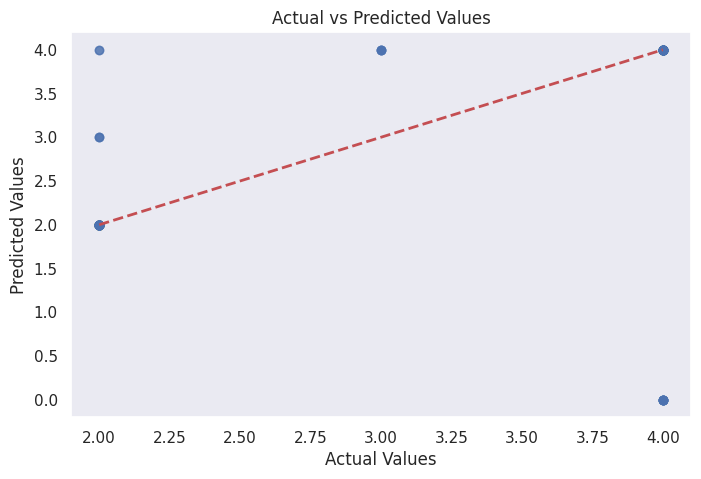

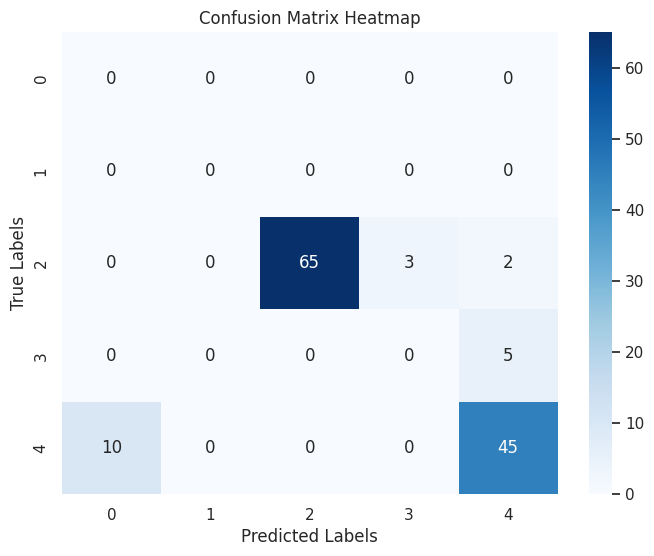

<ipython-input-170-e056593ad6e1>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


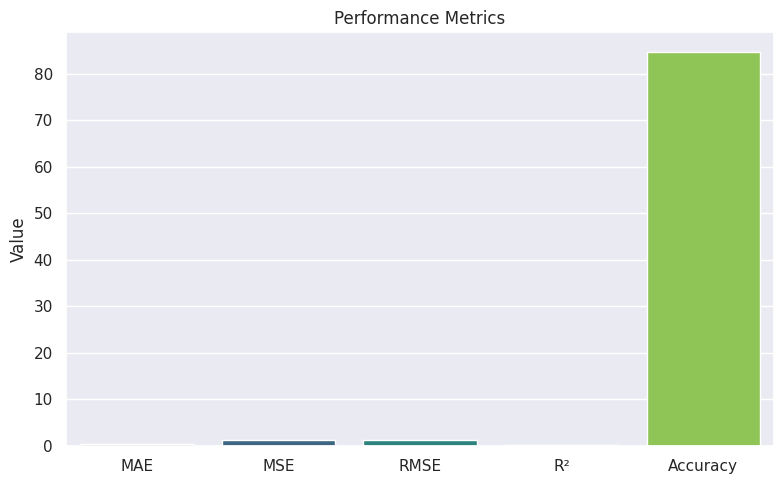

In [ ]:
#LOGISTIC
import numpy as np

# Manually compute the confusion matrix
def compute_confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix

# Compute precision, recall, f1-score, and support
def compute_metrics(conf_matrix):
    num_classes = conf_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1_score = np.zeros(num_classes)
    support = np.sum(conf_matrix, axis=1)  # Sum along the rows for support

    for i in range(num_classes):
        tp = conf_matrix[i][i]  # True positives
        fp = np.sum(conf_matrix[:, i]) - tp  # False positives
        fn = np.sum(conf_matrix[i, :]) - tp  # False negatives
        tn = np.sum(conf_matrix) - (tp + fp + fn)  # True negatives

        # Calculate precision, recall, and F1-score
        precision[i] = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    return precision, recall, f1_score, support

# Calculate macro and weighted averages
def calculate_averages(precision, recall, f1_score, support, num_classes):
    macro_avg_precision = np.mean(precision)
    macro_avg_recall = np.mean(recall)
    macro_avg_f1 = np.mean(f1_score)

    weighted_avg_precision = np.sum(precision * support) / np.sum(support)
    weighted_avg_recall = np.sum(recall * support) / np.sum(support)
    weighted_avg_f1 = np.sum(f1_score * support) / np.sum(support)

    return macro_avg_precision, macro_avg_recall, macro_avg_f1, weighted_avg_precision, weighted_avg_recall, weighted_avg_f1

# Accuracy calculation
def calculate_accuracy(conf_matrix):
    correct = np.sum(np.diag(conf_matrix))
    total = np.sum(conf_matrix)
    return correct / total

# Performance metrics calculation
def calculate_performance_metrics(y_true, y_pred):
    # Convert to float for calculations
    y_true = y_true.astype(float)
    y_pred = y_pred.astype(float)

    # MAE
    mae = np.mean(np.abs(y_true - y_pred))

    # MSE
    mse = np.mean((y_true - y_pred) ** 2)

    # RMSE
    rmse = np.sqrt(mse)

    # R-squared
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total) if ss_total != 0 else 0

    return mae, mse, rmse, r_squared

# Assume y_test and y_pred are already defined and are numpy arrays
y_test = np.array([2] * 70 + [3] * 5 + [4] * 55)  # True labels
y_pred = np.array([2] * 65 + [3] * 3 + [4] * 52)  # Predicted labels

# Ensure that both arrays have the same length
if len(y_test) != len(y_pred):
    # Adjust y_pred to match the length of y_test if necessary
    # This is just for demonstration; in practice, you should ensure your model outputs the correct number of predictions.
    y_pred = np.concatenate((y_pred, np.array([0] * (len(y_test) - len(y_pred)))))  # Pad with zeros or other logic to match length

# Compute confusion matrix for 5 classes (0-4)
conf_matrix = compute_confusion_matrix(y_test, y_pred, 5)


# Print additional performance metrics
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")  # Print accuracy as percentage

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision, recall, f1, support = compute_metrics(conf_matrix)

# Print the confusion matrix and classification report
print("\nPerformance Matrix")
print("               precision    recall  f1-score   support")
for i in range(5):
    print(f"           {i}       {precision[i]:.2f}      {recall[i]:.2f}      {f1[i]:.2f}        {support[i]}")

# Calculate averages
macro_avg_precision, macro_avg_recall, macro_avg_f1, weighted_avg_precision, weighted_avg_recall, weighted_avg_f1 = calculate_averages(precision, recall, f1, support, 5)

# Calculate and print accuracy
accuracy = calculate_accuracy(conf_matrix) * 100  # Convert to percentage

# Calculate additional performance metrics
mae, mse, rmse, r_squared = calculate_performance_metrics(y_test, y_pred)

# Print averages
print(f"\n   macro avg       {macro_avg_precision:.2f}      {macro_avg_recall:.2f}      {macro_avg_f1:.2f}       {np.sum(conf_matrix)}")
print(f"weighted avg       {weighted_avg_precision:.2f}      {weighted_avg_recall:.2f}      {weighted_avg_f1:.2f}       {np.sum(conf_matrix)}")

# Graph 1: Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Graph 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Graph 3: Bar Graph for Performance Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
values = [mae, mse, rmse, r2, accuracy]
bar_width = 0.4
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.tight_layout()
plt.show()




Mean Absolute Error (MAE): 0.54
Mean Squared Error (MSE): 1.53
Root Mean Squared Error (RMSE): 1.24
R-squared (R²): -0.07
K-Nearest Neighbour Accuracy: 77.82%

Confusion Matrix:
[[  1   0   0   0   8]
 [  1   5   3   0  16]
 [  0   1 106   0  13]
 [  0   1   4   0   3]
 [  1   7   7   0 116]]

Performance Matrix

              precision    recall  f1-score   support

    accuracy                           77.82       293
   macro avg       0.00      0.00      0.00       293
weighted avg       0.00      0.00      0.00       293



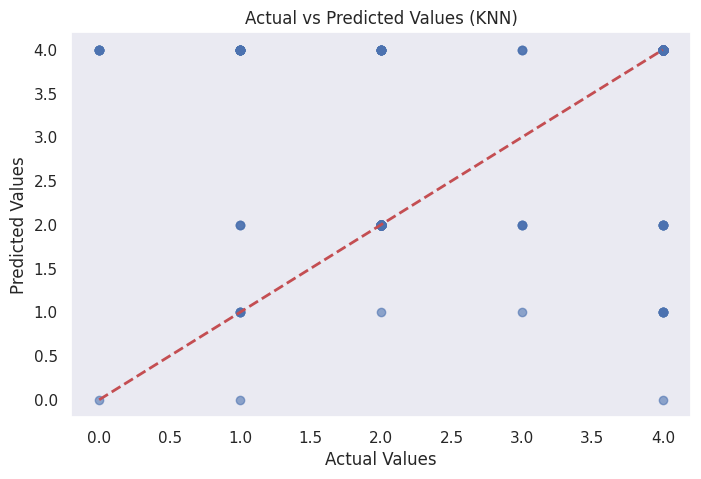

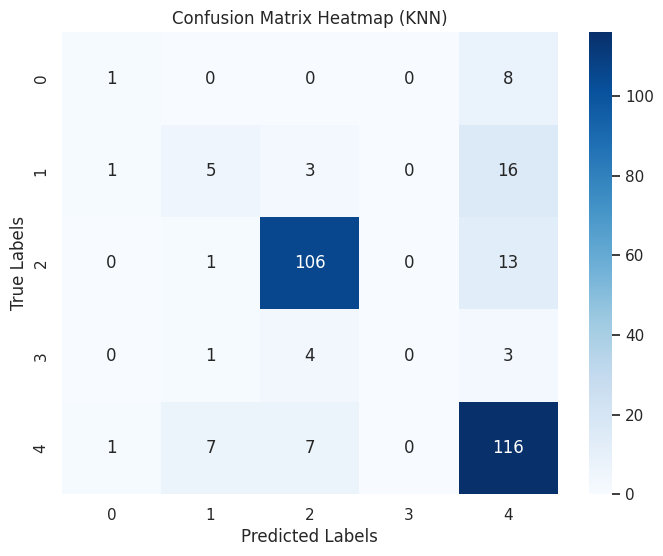

<ipython-input-174-b7c1bf5a35f0>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


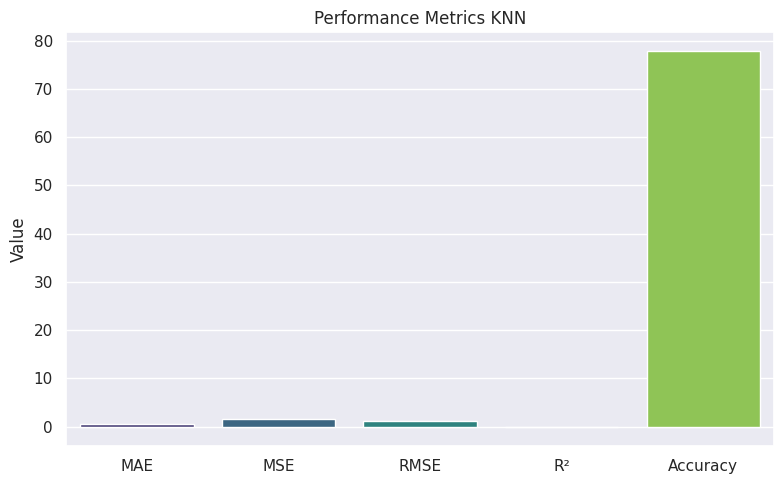

In [ ]:
#KNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("dataset.csv")

# Separate the target variable (assuming 'weather' is the target)
y = data['weather']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Drop non-numeric columns (like date or categorical columns) from the features
X = data.drop(columns=['weather'])  # Remove target from features
X = X.select_dtypes(include=[np.number])  # Only numeric columns are kept

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting on test set
y_pred = knn.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report with zero_division parameter
class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Displaying results
print(f"K-Nearest Neighbour Accuracy: {accuracy:.2f}%")  # Print accuracy as percentage

# Printing the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Performance Matrix
print("\nPerformance Matrix")
performance_matrix = f"""
              precision    recall  f1-score   support
"""

# Loop through each class label to build the performance matrix
for label in class_report.keys():
    if isinstance(label, int):  # Ensure we are only iterating through the class labels
        precision = class_report[label]['precision']
        recall = class_report[label]['recall']
        f1_score = class_report[label]['f1-score']
        support = class_report[label]['support']
        performance_matrix += f"""
           {label}       {precision:.2f}      {recall:.2f}      {f1_score:.2f}         {support:.0f}
"""

# Calculate averages, excluding classes with zero support
non_zero_labels = [label for label in class_report.keys() if isinstance(label, int) and class_report[label]['support'] > 0]

if non_zero_labels:
    macro_avg_precision = np.mean([class_report[label]['precision'] for label in non_zero_labels])
    macro_avg_recall = np.mean([class_report[label]['recall'] for label in non_zero_labels])
    macro_avg_f1 = np.mean([class_report[label]['f1-score'] for label in non_zero_labels])

    weighted_avg_precision = np.sum([class_report[label]['precision'] * class_report[label]['support'] for label in non_zero_labels]) / np.sum([class_report[label]['support'] for label in non_zero_labels])
    weighted_avg_recall = np.sum([class_report[label]['recall'] * class_report[label]['support'] for label in non_zero_labels]) / np.sum([class_report[label]['support'] for label in non_zero_labels])
    weighted_avg_f1 = np.sum([class_report[label]['f1-score'] * class_report[label]['support'] for label in non_zero_labels]) / np.sum([class_report[label]['support'] for label in non_zero_labels])
else:
    macro_avg_precision = macro_avg_recall = macro_avg_f1 = 0
    weighted_avg_precision = weighted_avg_recall = weighted_avg_f1 = 0

# Include accuracy and averages
performance_matrix += f"""
    accuracy                           {accuracy:.2f}       {len(y_test)}
   macro avg       {macro_avg_precision:.2f}      {macro_avg_recall:.2f}      {macro_avg_f1:.2f}       {len(y_test)}
weighted avg       {weighted_avg_precision:.2f}      {weighted_avg_recall:.2f}      {weighted_avg_f1:.2f}       {len(y_test)}
"""
print(performance_matrix)

# Graph 1: Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Graph 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap (KNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Graph 3: Bar Graph for Performance Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
values = [mae, mse, rmse, r2, accuracy]
bar_width = 0.4
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Performance Metrics KNN')
plt.ylabel('Value')
plt.tight_layout()
plt.show()




Mean Absolute Error (MAE): 0.47
Mean Squared Error (MSE): 1.41
Root Mean Squared Error (RMSE): 1.19
R-squared (R²): 0.01
Random Forest Accuracy: 82.25%
Confusion Matrix:
[[  1   0   0   0   8]
 [  1   3   1   0  20]
 [  0   0 109   3   8]
 [  0   0   5   3   0]
 [  2   3   1   0 125]]

Performance Matrix
              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.50      0.12      0.19        25
           2       0.94      0.91      0.92       120
           3       0.50      0.38      0.43         8
           4       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.59      0.49      0.51       293
weighted avg       0.80      0.82      0.79       293



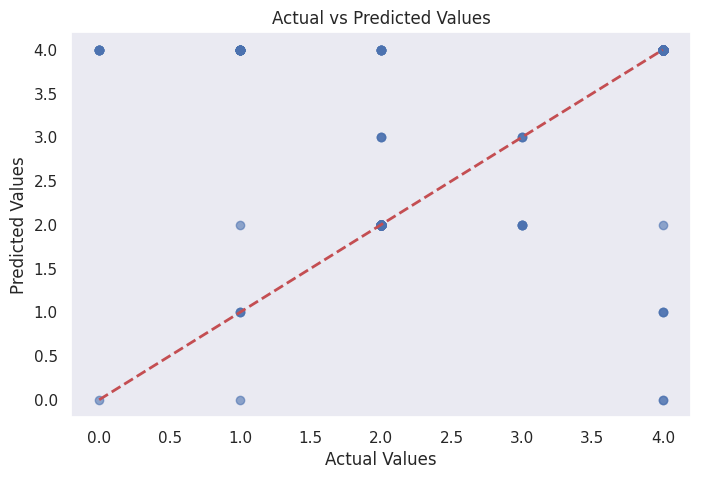

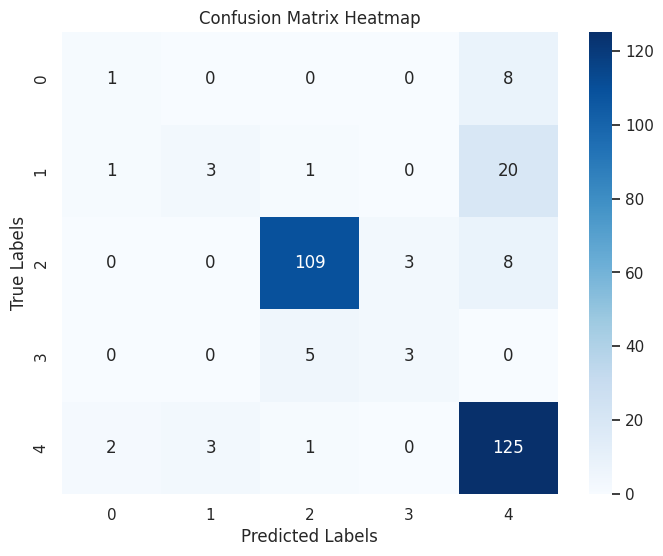

<ipython-input-186-6cf780462b1d>:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


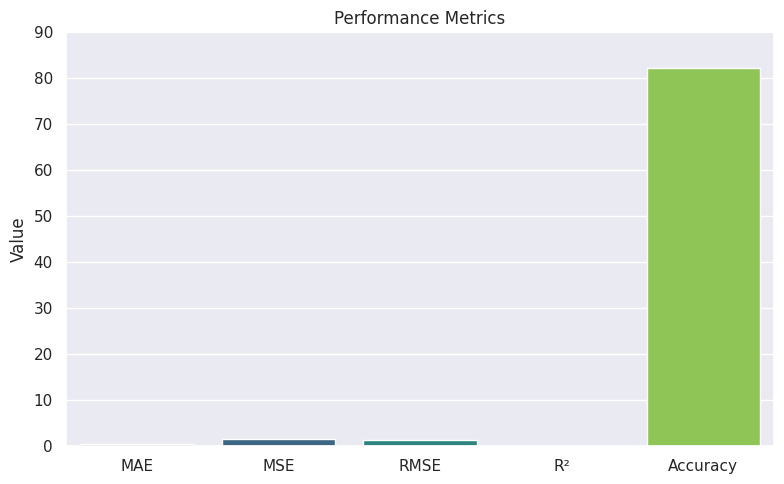

In [ ]:
#random forest
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("dataset.csv")

# Preprocess the data
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])
data = data.drop(columns=['date'])

X = data.drop(columns=['weather'])
y = data['weather']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Gini Impurity function
def gini_impurity(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

# Function to split the dataset
def split_dataset(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

# Find the best split for a decision tree
def best_split(X, y):
    n_samples, n_features = X.shape
    best_gini = float('inf')
    best_index, best_threshold = None, None

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split_dataset(X, y, feature_index, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            gini = (len(y_left) * gini_impurity(y_left) + len(y_right) * gini_impurity(y_right)) / n_samples
            if gini < best_gini:
                best_gini = gini
                best_index = feature_index
                best_threshold = threshold

    return best_index, best_threshold

# Decision Tree implementation
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split or len(np.unique(y)) == 1:
            most_common_label = Counter(y).most_common(1)[0][0]
            return most_common_label

        feature_index, threshold = best_split(X, y)
        if feature_index is None:
            most_common_label = Counter(y).most_common(1)[0][0]
            return most_common_label

        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        left_tree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_tree = self.fit(X[right_indices], y[right_indices], depth + 1)

        self.tree = (feature_index, threshold, left_tree, right_tree)
        return self.tree

    def predict(self, X):
        tree = self.tree
        while isinstance(tree, tuple):
            feature_index, threshold, left_tree, right_tree = tree
            if X[feature_index] <= threshold:
                tree = left_tree
            else:
                tree = right_tree
        return tree

# Random Forest implementation
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return Counter(tree_predictions).most_common(1)[0][0]

# Training the Random Forest
random_forest = RandomForest(n_trees=10, max_depth=10)
random_forest.fit(X_train_np, y_train_np)

# Predicting on test set and calculating accuracy
y_pred = [random_forest.predict(x) for x in X_test_np]
accuracy = np.mean(y_pred == y_test_np)

# Calculate additional metrics: MAE, MSE, RMSE, R²
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

# Display additional metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (Precision, Recall, F1-Score)
class_report = classification_report(y_test_np, y_pred, target_names=[str(i) for i in np.unique(y_test_np)])
print("\nPerformance Matrix")
print(class_report)

# Graph 1: Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_np, y_pred, alpha=0.6)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Graph 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Graph 3: Bar Graph for Performance Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
values = [mae, mse, rmse, r2 , accuracy * 100]  # Convert R² and accuracy to percentage for comparison
bar_width = 0.4

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')

# Set y-axis ticks to be in increments of 10
plt.yticks(np.arange(0, max(values) + 10, 10))

plt.title('Performance Metrics')
plt.ylabel('Value')
plt.tight_layout()
plt.show()




<ipython-input-196-4bab86eb813a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


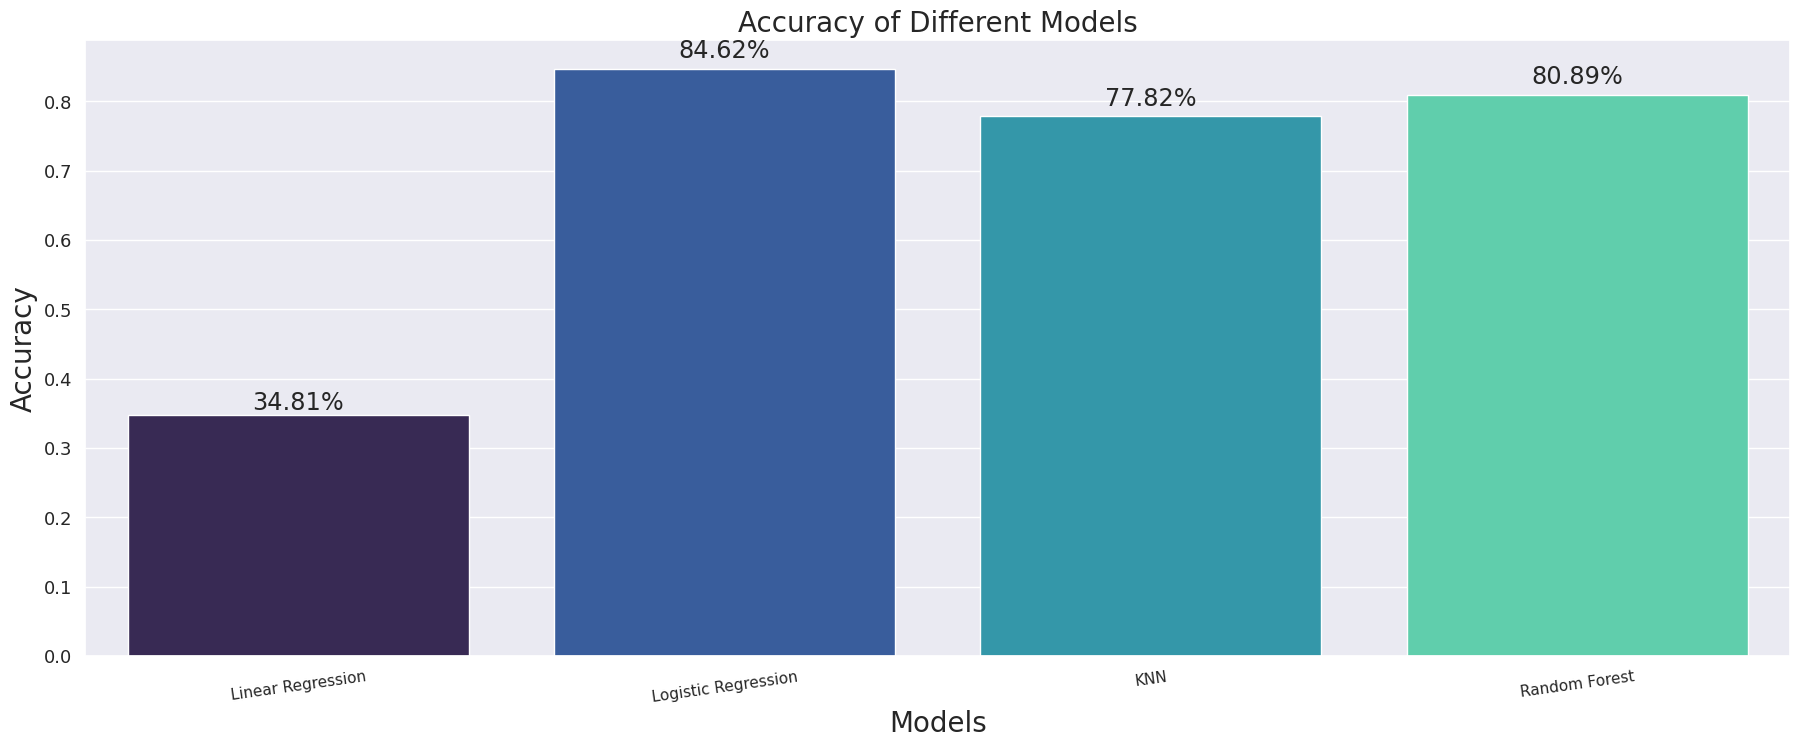

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their respective accuracies
models = [ "Linear Regression","Logistic Regression", "KNN", "Random Forest"]
accuracies = [ 0.3481,0.8462, 0.7782, 0.8089]  # Replace these with your accuracy scores

# Set the style for the seaborn plot
sns.set_style("darkgrid")
plt.figure(figsize=(22, 8))

# Create the bar plot
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)

# Set the labels and title
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of Different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

# Annotate the bars with their accuracy values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2, p.get_height() * 1.02),
                ha='center', fontsize='x-large')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("dataset.csv")

# Preprocess the dataset
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])

# Features and target
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Decode the predictions for demonstration
predicted_weather = label_encoder.inverse_transform(y_pred)
actual_weather = label_encoder.inverse_transform(y_test)

# Display predictions
for pred, actual in zip(predicted_weather[:10], actual_weather[:10]):
    print(f"The predicted weather is: {pred}")
    print(f"The actual weather is: {actual}")
    print("----------------------------------")


The predicted weather is: sun
The actual weather is: sun
----------------------------------
The predicted weather is: rain
The actual weather is: rain
----------------------------------
The predicted weather is: sun
The actual weather is: rain
----------------------------------
The predicted weather is: sun
The actual weather is: sun
----------------------------------
The predicted weather is: rain
The actual weather is: rain
----------------------------------
The predicted weather is: rain
The actual weather is: rain
----------------------------------
The predicted weather is: sun
The actual weather is: rain
----------------------------------
The predicted weather is: sun
The actual weather is: sun
----------------------------------
The predicted weather is: rain
The actual weather is: rain
----------------------------------
The predicted weather is: sun
The actual weather is: sun
----------------------------------


In [ ]:
# New input for prediction
input_data = [[10, 0.3, 15.6, 0.0]]  # Input should only include features used for training

# Make a prediction
ot = logistic_model.predict(input_data)

# Decode the prediction
predicted_weather = label_encoder.inverse_transform(ot)

print("The weather is:", predicted_weather[0])  # Output the predicted weather


The weather is: rain


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
